In [35]:
import numpy as np
import torch

mask = np.array([
    [1, 0, 0, 0, 0],
    [1, 1, 0, 2, 2],
    [1, 1, 0, 2, 2],
    [0, 0, 0, 2, 2],
    [0, 0, 0, 0, 0]
])

pred = np.array([
    [0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0],
    [1, 0, 0, 2, 2],
    [1, 0, 0, 2, 2],
    [0, 0, 0, 2, 2]
])

print(np.where(mask | pred > 0, 1, 0))

for c in (1, 2, 3):
    tp = np.sum(pred[mask == c] == c) #TP
    fn = np.sum(pred[mask == c] != c) #TP
    fp = np.sum(mask[pred == c] != c) #FP
    precision = tp / (tp + fp + 1e-6)
    recall = tp / (tp + fn + 1e-6)
    print(f"Class {c}: TP: {tp} FN: {fn}, FP: {fp}, precision: {precision:.2}, recall: {recall:.2f}")

[[1 0 0 0 0]
 [1 1 0 1 1]
 [1 1 0 1 1]
 [1 0 0 1 1]
 [0 0 0 1 1]]
Class 1: TP: 2 FN: 3, FP: 1, precision: 0.67, recall: 0.40
Class 2: TP: 4 FN: 2, FP: 2, precision: 0.67, recall: 0.67
Class 3: TP: 0 FN: 0, FP: 0, precision: 0.0, recall: 0.00


array([[0, 0, 0],
       [0, 1, 2],
       [1, 1, 0]])

In [18]:
ar = torch.Tensor(np.array([
    [
        [0, 0, 2],
        [3, 2, 0],
        [0, 0, 0]
    ],
    [
        [0, 1, 1],
        [0, 2, 0],
        [0, 3, 0]
    ],
    [
        [0, 3, 0],
        [2, 0, 0],
        [0, 1, 0]
    ],
    [
        [0, 0, 0],
        [0, 0, 3],
        [0, 0, 0]
    ]
]))

np.array([torch.sum(x == 1).item() for x in ar]) > 0

array([False,  True,  True, False])

0.01

array([False, False,  True])

In [19]:
import numpy as np
from PIL import Image
import os
from torchvision.utils import draw_segmentation_masks
import torch
import utils
import tiles
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

In [22]:
tiles.generate_tile_cache("data//images", "data//masks", "cache", size=320, zero_sampling=0)

--- generating cache ---
workers in use: 12
0/172


In [4]:
utils.generate_validation_set("cache", 0.1)

[0 1 2 3]


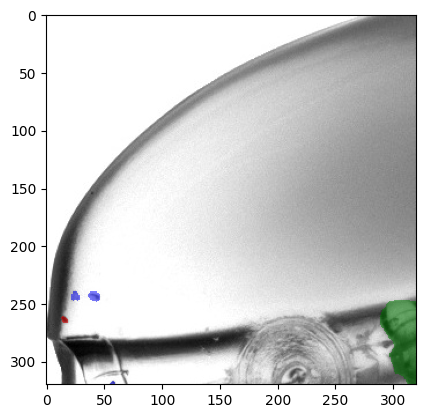

[0 1 2 3]


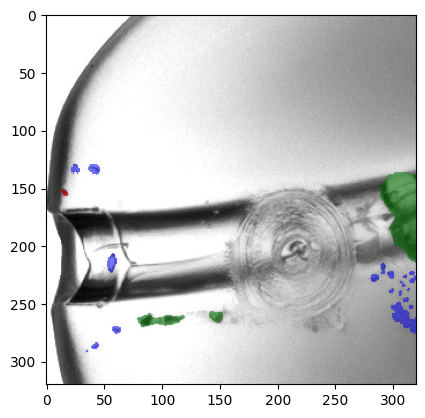

[0 2 3]


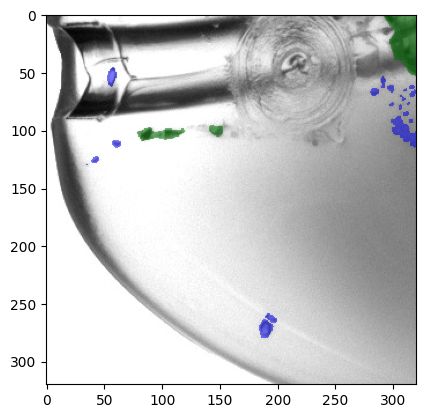

[0 3]


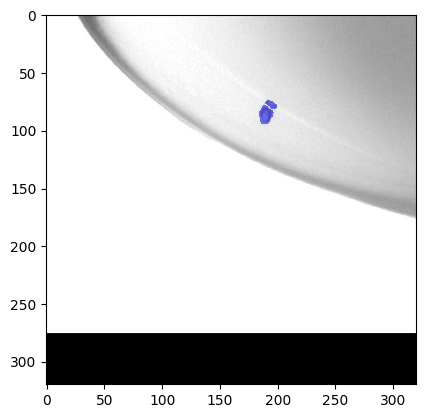

[0 2 3]


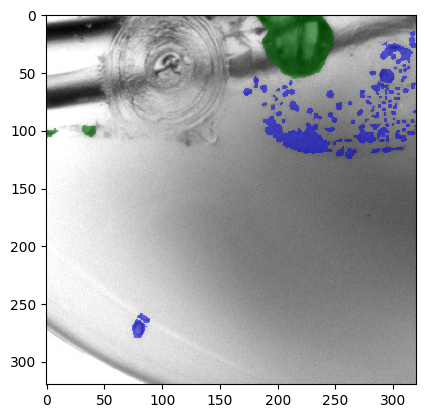

[0 3]


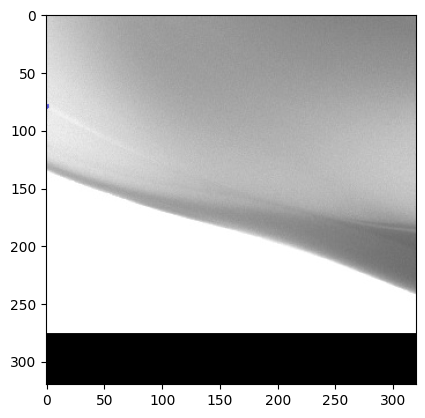

[0 2 3]


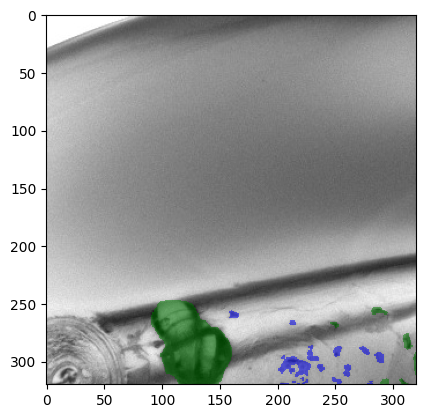

[0 2 3]


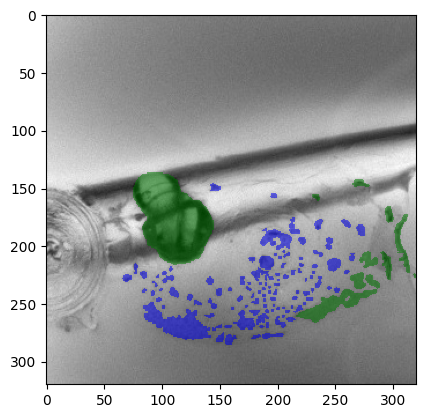

[0 2 3]


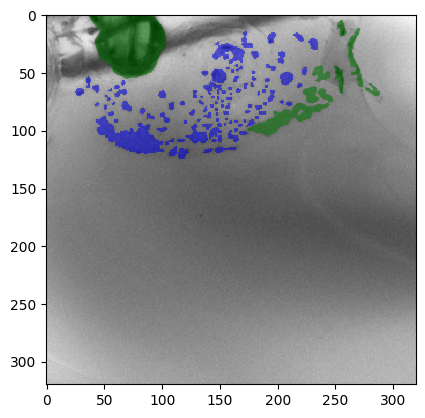

[0 2 3]


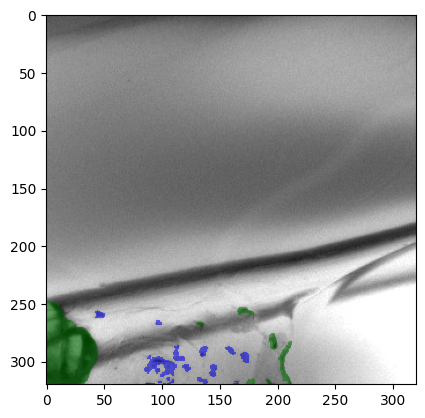

In [23]:
i = 1
for name in os.listdir("cache\labels\\"):
    mask = np.array(Image.open("cache\labels\\" + name).convert("L"))
    img = np.array(Image.open("cache\images\\" + name.replace("png", "jpg")))
    print(np.unique(mask))
    plt.imshow(img, alpha=1, cmap="gray")
    plt.imshow(mask, alpha=0.5, interpolation="nearest", cmap=ListedColormap(((0, 0, 0, 0), ("red"), ("green"), ("blue"))))  
    plt.show()
    if i >= 10:
        break
    i += 1

In [6]:
np.unique(np.array(Image.open("data//masks//IMG_2024-05-23_0912045756.png")))

array([  0,   1,   2,   3, 255], dtype=uint8)

(array([0, 1, 2, 3], dtype=uint8), array([100595,     25,   1650,    130], dtype=int64))


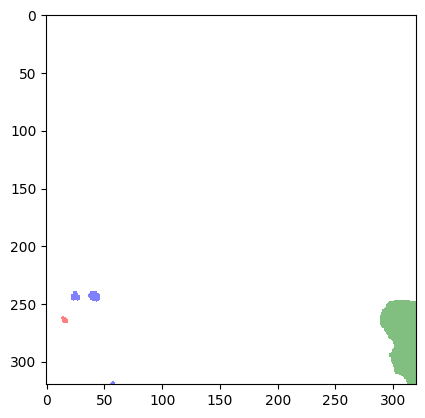

(array([0, 1, 2, 3], dtype=uint8), array([99515,    25,  2063,   797], dtype=int64))


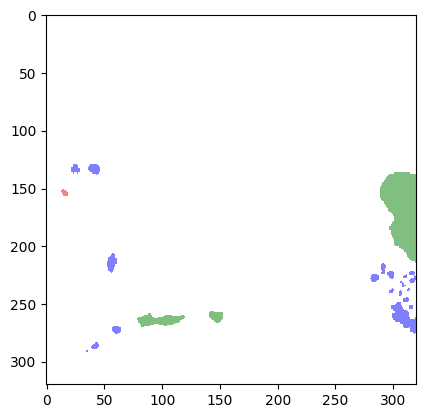

(array([0, 2, 3], dtype=uint8), array([100139,   1384,    877], dtype=int64))


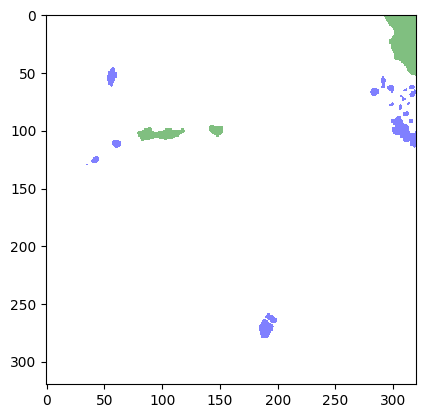

(array([0, 3], dtype=uint8), array([102201,    199], dtype=int64))


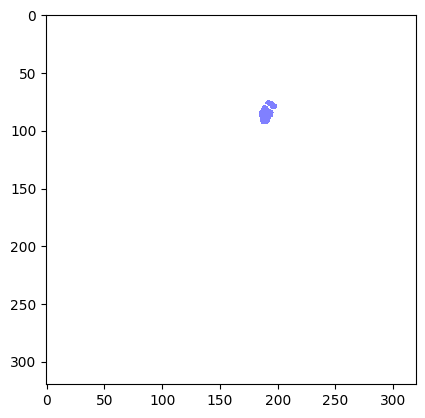

(array([0, 2, 3], dtype=uint8), array([96242,  2948,  3210], dtype=int64))


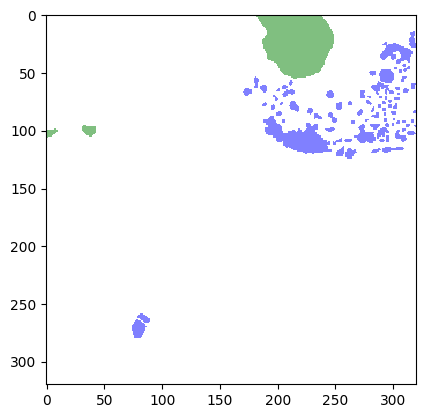

(array([0, 3], dtype=uint8), array([102388,     12], dtype=int64))


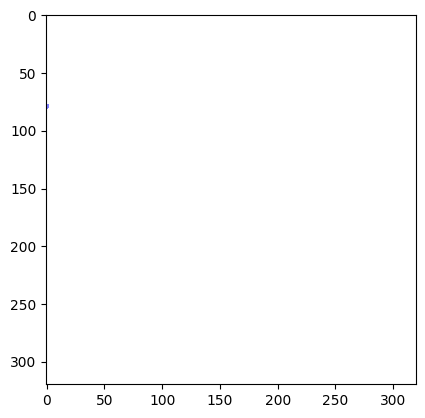

(array([0, 2, 3], dtype=uint8), array([97808,  3839,   753], dtype=int64))


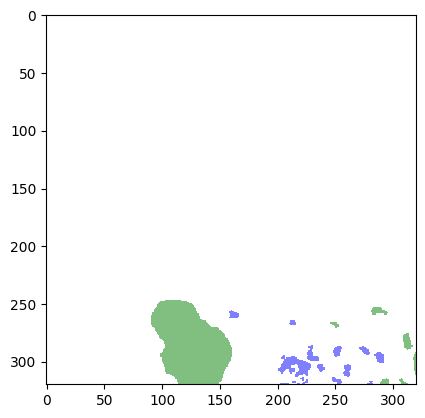

(array([0, 2, 3], dtype=uint8), array([93307,  5346,  3747], dtype=int64))


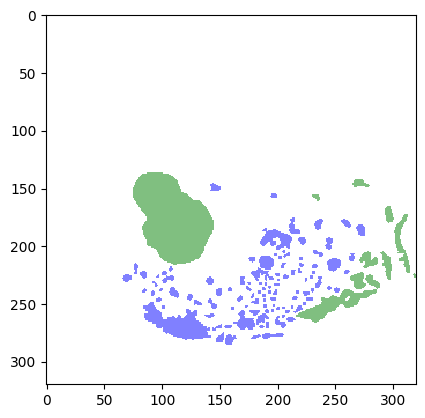

(array([0, 2, 3], dtype=uint8), array([94333,  4385,  3682], dtype=int64))


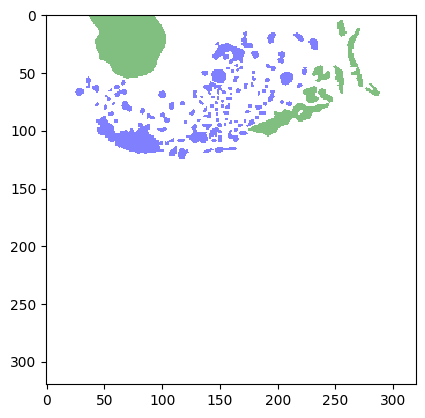

(array([0, 2, 3], dtype=uint8), array([98879,  2768,   753], dtype=int64))


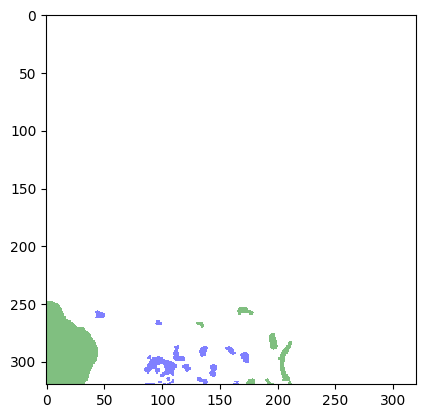

[0, 1932, 848, 1607]


In [32]:
classes_counts = [0 for _ in range(4)]
a = 0
for name in os.listdir("cache\labels\\"):
    img = np.array(Image.open("cache\labels\\" + name))
    for c in range(1, 4):
        if np.sum(img == c) > 0:
            classes_counts[c] += 1
        if c == 1 and a < 10:
            print(np.unique(img, return_counts=True))
            plt.imshow(img, alpha=0.5, interpolation="nearest", cmap=ListedColormap(((0, 0, 0, 0), ("red"), ("green"), ("blue"))))  
            plt.show()
            a += 1
print(classes_counts)

In [7]:
import math

zero_sampling = 0.2

i = 0
last = 0
for j in range(20):
    curr = math.floor(i * zero_sampling)
    print(f"i: {i} curr: {curr} last: {last}")
    if curr != last:
        print("Apended")
    else:
        print("No")
    i += 1
    last = curr

i: 0 curr: 0 last: 0
No
i: 1 curr: 0 last: 0
No
i: 2 curr: 0 last: 0
No
i: 3 curr: 0 last: 0
No
i: 4 curr: 0 last: 0
No
i: 5 curr: 1 last: 0
Apended
i: 6 curr: 1 last: 1
No
i: 7 curr: 1 last: 1
No
i: 8 curr: 1 last: 1
No
i: 9 curr: 1 last: 1
No
i: 10 curr: 2 last: 1
Apended
i: 11 curr: 2 last: 2
No
i: 12 curr: 2 last: 2
No
i: 13 curr: 2 last: 2
No
i: 14 curr: 2 last: 2
No
i: 15 curr: 3 last: 2
Apended
i: 16 curr: 3 last: 3
No
i: 17 curr: 3 last: 3
No
i: 18 curr: 3 last: 3
No
i: 19 curr: 3 last: 3
No
